In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:/data/flight_price/flight_price.csv")

In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Deleting the Unnamed column.

In [5]:
data =data.drop('Unnamed: 0', axis = 1)

Checking the data

In [6]:
data.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [7]:
data.flight.value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [8]:
data.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [9]:
data.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [10]:
data.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [11]:
data.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [12]:
data.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [13]:
data["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

Looking at the data we can one hot encode some of the columns, drop the flight column, change "stops" into numerical feature, "class" into binary feature and leave duration, days_left and price as they are.

In [14]:
data = data.drop('flight',axis = 1)

In [15]:
data["class"] = data['class'].apply(lambda x:1 if x == 'Business' else 0)

In [16]:
data["stops"] = data['stops'].apply(lambda x:1 if x == 'one' else (2 if x == 'two_or_more' else 0))

In [17]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [18]:
columns_to_encode = ['airline', 'source_city', 'destination_city', 'arrival_time','departure_time']

for column in columns_to_encode:
    data = data.join(pd.get_dummies(data[column], prefix=column)).drop(column, axis=1)

In [19]:
data

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Training regression model

In [20]:
X, y = data.drop('price',axis =1), data.price

In [21]:
X.head()

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [22]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

54102     16706
54562      8148
54713      5102
243846    69885
81844      3000
          ...  
113849     6133
229691    22140
264410    91487
197727     3342
188568     7142
Name: price, Length: 60031, dtype: int64

To speed up the process we can set the n_jobs parameter to utilize all available CPU cores. (By setting it to -1 we will utilize all of them without checking the number without using os or multiprocessing modules).

In [24]:
reg = RandomForestRegressor(n_jobs =-1)

In [25]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [26]:
reg.score(X_test,y_test)

0.9855386531802212

Evaluating data

In [27]:
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2: {r2},\n MAE: {mae},\n MSE: {mse},\n RMSE: {rmse}\n')

R2: 0.9855386531802212,
 MAE: 1060.4333256308976,
 MSE: 7457305.609054992,
 RMSE: 2730.8067688972415



Text(0.5, 1.0, 'Predicted vs Actual Price')

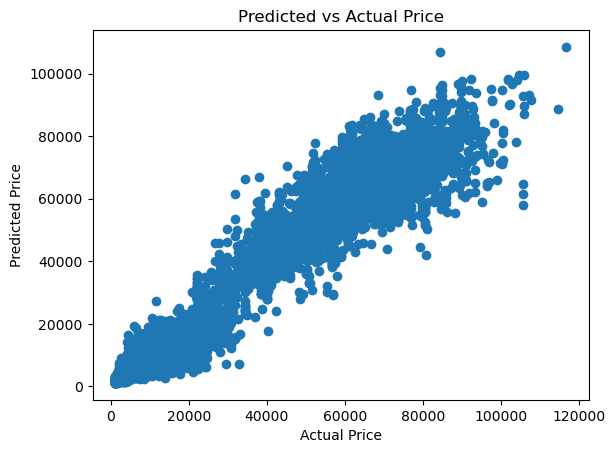

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')

Points are scattered in a shape of a line and are not that badly distributed so the variance is not that big. Model is performing pretty well.

In [29]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)

In [30]:
print("Top 5 most important features:")
for i, (feature, importance) in enumerate(sorted_importances[:5], start=1):
    print(f"{i}.{feature}: {importance}")

Top 5 most important features:
1.class: 0.8794291015749665
2.duration: 0.05817786863618902
3.days_left: 0.01865173792387153
4.airline_Vistara: 0.005041180139479383
5.airline_Air_India: 0.0048689737678500765


Hyperparameter tuning:

In [43]:
param_distribution = {
    'n_estimators': randint(100,300),
    'max_depth': [10, 20, 30, 40, 50, 60, None],
    'min_samples_split': randint(2,15),
    'min_samples_leaf': randint(1,5),
    'max_features': ['sqrt', 'log2', 'auto']
}
reg = RandomForestRegressor(n_jobs=-1)

In [44]:
rand_search = RandomizedSearchCV(estimator=reg, param_distributions=param_distribution, scoring='neg_mean_squared_error',random_state = 1998, cv=5, verbose=2, n_iter=10, n_jobs=-1)
rand_search.fit(X_train, y_train)
print(f"Best Parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 166}


In [45]:
best_regressor = rand_search.best_estimator_

In [46]:
y_pred = best_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2: {r2},\n MAE: {mae},\n MSE: {mse},\n RMSE: {rmse}\n')

R2: 0.9865080492916379,
 MAE: 1080.0280364692183,
 MSE: 6957415.5815800205,
 RMSE: 2637.6913355394754



Text(0.5, 1.0, 'Predicted vs Actual Price')

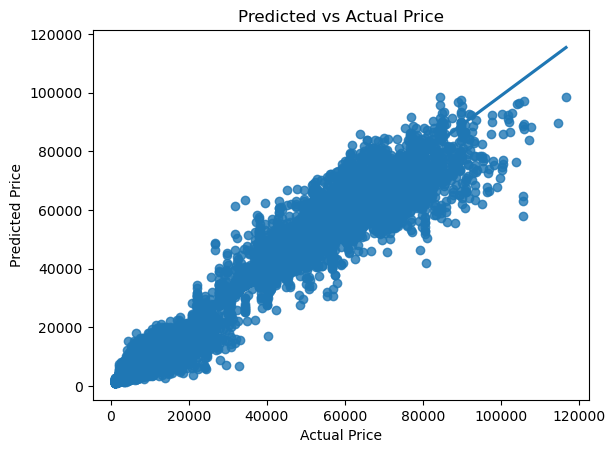

In [50]:
sns.regplot(x = y_test, y= y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')

In [51]:
y_test

54102     16706
54562      8148
54713      5102
243846    69885
81844      3000
          ...  
113849     6133
229691    22140
264410    91487
197727     3342
188568     7142
Name: price, Length: 60031, dtype: int64

In [57]:
end = pd.DataFrame({'Actual' : y_test,'Predicted' : y_pred})

In [59]:
data_p = X_test.merge(end, left_index = True, right_index = True)

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,Actual,Predicted
54102,1,0,5.42,9,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,16706,10684.670538
54562,1,0,22.08,12,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,8148,8662.298168
54713,1,0,13.58,13,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,5102,5233.723023
243846,1,1,8.08,34,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,69885,61835.819923
81844,0,0,1.83,34,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,3000,3021.971051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113849,1,0,15.92,36,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,6133,6331.156067
229691,0,1,2.33,47,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,22140,22140.000000
264410,1,1,11.00,8,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,91487,79038.517904
197727,1,0,15.25,49,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,3342,5205.000983


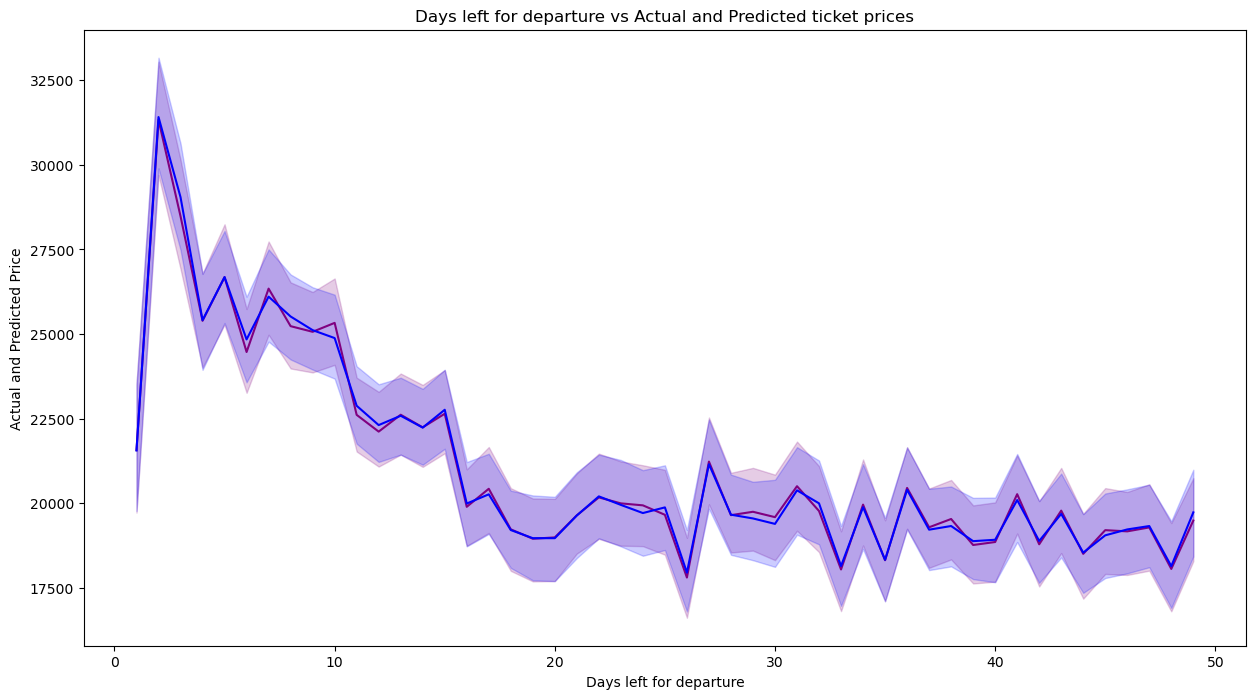

In [68]:
plt.figure(figsize = (15,8))
sns.lineplot(data =data_p, x='days_left', y = 'Actual', color = 'purple')
sns.lineplot(data =data_p, x='days_left', y = 'Predicted', color = 'blue')
plt.title('Days left for departure vs Actual and Predicted ticket prices')
plt.xlabel('Days left for departure')
plt.ylabel('Actual and Predicted Price')
plt.show()